In [1]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
%matplotlib inline

In [2]:
df = pd.read_csv("kc_housing_data_cleaned.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,M,D,Y
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,1955.0,98178,47.5112,-122.257,1340,5650,10,13,2014
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,9,2014
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,1933.0,98028,47.7379,-122.233,2720,8062,2,25,2015
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,1965.0,98136,47.5208,-122.393,1360,5000,12,9,2014
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,1987.0,98074,47.6168,-122.045,1800,7503,2,18,2015


In [69]:
X1 = df[['sqft_living','sqft_lot','view']]
y1 = df['price']
X = sm.add_constant(X1)
first_multi = sm.OLS(y1,X)
results = first_multi.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     8306.
Date:                Mon, 20 Jan 2020   Prob (F-statistic):               0.00
Time:                        13:06:13   Log-Likelihood:            -2.9910e+05
No. Observations:               21597   AIC:                         5.982e+05
Df Residuals:                   21593   BIC:                         5.982e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.822e+04   4260.304     -4.276      0.000   -2.66e+04   -9864.532
sqft_living   259.4517      1.959    132.466      0.000     255.613     263.291
sqft_lot       -0.3427      0.042     -8.202      0.000      -0.425      -0.261
view         1.027e+05   2322.546     44.211      0.000    9.81e+04    1.07e+05
==============================================================================
Omnibus:                    14285.622   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           566013.185
Skew:                           2.644   Prob(JB):                         0.00
Kurtosis:                      27.516   Cond. No.                     1.11e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
x1 = df['sqft_living']
y1 = df['price']
X = sm.add_constant(x1)
model_sm = sm.OLS(y1,X)
results = model_sm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 20 Jan 2020   Prob (F-statistic):               0.00
Time:                        13:00:01   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Isolating the desired zipcode...

In [3]:
unique_zips = df['zipcode'].unique()
unique_zips

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [4]:
len(unique_zips)

70

In [5]:
zipcode = 98178
zipcode_data = df.loc[df['zipcode'] == zipcode]

Plotting the postcode vs the average sale price. This analysis aims to see how the importance of variables change with the price of the property.

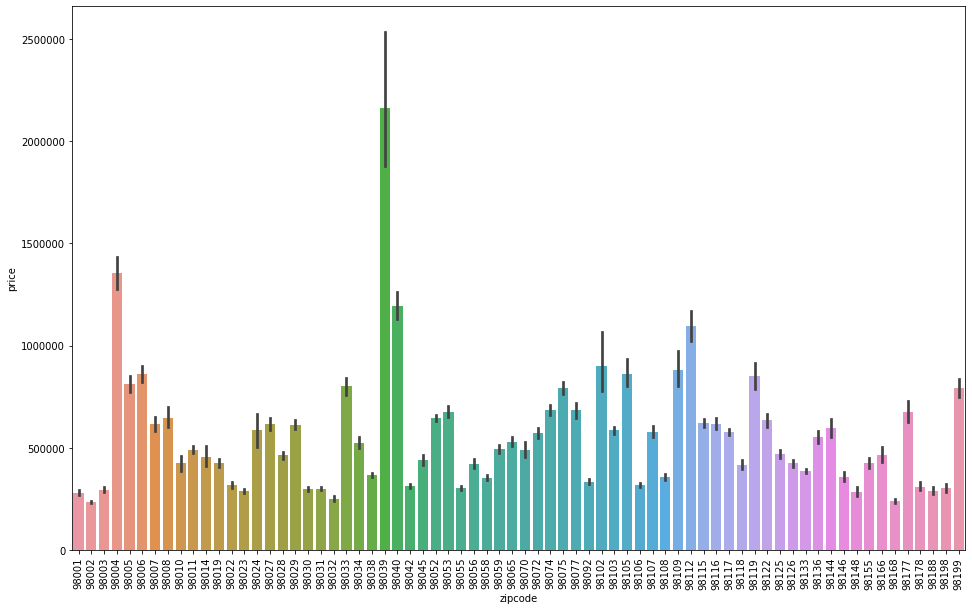

In [8]:
plt.figure(figsize=(16, 10))
sns.barplot(x='zipcode',y='price',data=df)
plt.xticks(rotation=90)
plt.show()

# Calculating the distance of each house from Downtown Seattle

In [18]:
lat_one_degree = 69
long_one_degree = 55.016

def distance_function(city_lat, city_long, house_lat, house_long):
    
    R = 6372800  # Earth radius in meters
    phi1, phi2 = math.radians(city_lat), math.radians(house_lat)
    dphi       = math.radians(house_lat - city_lat)
    dlambda    = math.radians(house_long - city_long)
    a = math.sin(dphi/2)**2 + \
        math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    
    return 2*R*math.atan2(math.sqrt(a), math.sqrt(1 - a))/(1000*1.60934)  #Convert code from meters to miles

city_lat = 47.605
city_long = -122.3344
    
house_lat = df.loc[0, 'lat'] 
house_long = df.loc[0, 'long']
    
distance_function(city_lat, city_long, house_lat, house_long)

7.420144604386407

In [19]:
city_lat = 47.605
city_long = -122.3344
distance_list = []

for i in range(len(df)):
    
    house_lat = df.loc[i, 'lat'] 
    house_long = df.loc[i, 'long']
    
    distance = distance_function(city_lat, city_long, house_lat, house_long)
    
    distance_list.append(distance)

In [21]:
df['Distance to Town'] = distance_list

In [22]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,M,D,Y,Distance to Town
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955.0,98178,47.5112,-122.257,1340,5650,10,13,2014,7.420145
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1991.0,98125,47.7210,-122.319,1690,7639,12,9,2014,8.049092
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933.0,98028,47.7379,-122.233,2720,8062,2,25,2015,10.326482
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965.0,98136,47.5208,-122.393,1360,5000,12,9,2014,6.429078
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987.0,98074,47.6168,-122.045,1800,7503,2,18,2015,13.508751


<Figure size 1152x864 with 0 Axes>

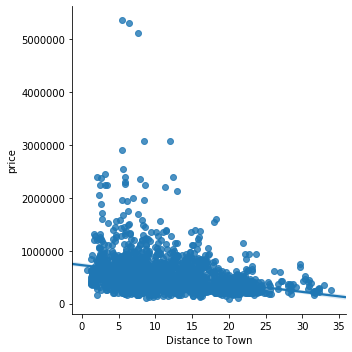

In [23]:
plt.figure(figsize = (16, 12))
sns.lmplot('Distance to Town', 'price', data=df[:2000])
plt.show()